# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#checking the present directory
import os
os.getcwd()

'/content'

In [5]:
#changing the directory to the folder where data is present
os.chdir('/content/drive/MyDrive/data/')

In [6]:
os.getcwd()

'/content/drive/MyDrive/data'

In [147]:
#loading all the necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras  import callbacks
from tensorflow.keras import optimizers
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [73]:
#loading the data
tempdf = pd.read_csv('daily-minimum-temperatures-in-me.csv')

In [205]:
#will be used at the time of plot in later stage
dataset = tempdf.values
dataset = dataset.astype('float32')

### Print the data
- First 5 rows only

### Set index column
- Set the DataFrame index using "Date" column

In [75]:
#setting index to date
tempdf = tempdf.set_index('Date')

In [76]:
tempdf.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


## Question 2

### Check the total count of null values in the data

In [77]:
#checking the null values
tempdf.isna().sum()
#there are no null values

Temperature    0
dtype: int64

### Drop all the rows with null values
- use dropna() method

In [78]:
#though there are no null dropping it
tempdf = tempdf.dropna()

## Question 3

### Describe your dataframe
- use describe() method

In [79]:
#describe to check the mean,std,interquartiles
tempdf.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

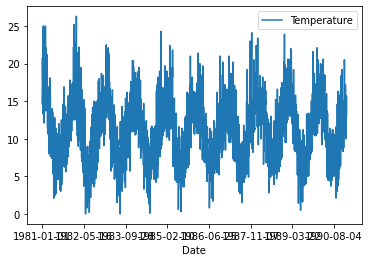

In [80]:
#checking the plot
tempdf.plot()

### Get representation of the distribution of data using histogram
- use hist() method

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7652b1780>]],
      dtype=object)

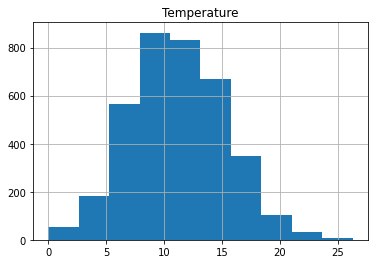

In [81]:
#histogram used to show frequency distribution
tempdf.hist()

### Check minimum and maximum temperature
- use min() and max() methods

In [82]:
#checking the minimum and maximum temperature values
tempdf.max()

Temperature    26.3
dtype: float64

In [83]:
tempdf.min()

Temperature    0.0
dtype: float64

## Question 4

### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [84]:
#checking the shape of the data
tempdf.shape

(3650, 1)

In [85]:
#forming train,test data
traindf = tempdf[:int(len(tempdf)*0.75)]
testdf = tempdf[int(len(tempdf)*0.75):]

In [86]:
#checking the shape of the data
traindf.shape,testdf.shape

((2737, 1), (913, 1))

In [87]:
#viewing sample train data
traindf.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [88]:
#using minmax scaler to normalize data. minmax scaler is used
traindf = traindf.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
#scaled train data
train_scaled = scaler.fit_transform(traindf)

In [89]:
testdf = testdf.astype('float32')

In [90]:
#scaled test data
test_scaled = scaler.transform(testdf)

### Print scaled train and test data
- print only first 5 values

In [91]:
train_scaled[1:5]

array([[0.6806084],
       [0.7148289],
       [0.5551331],
       [0.6007605]], dtype=float32)

In [92]:
test_scaled[1:5]

array([[0.22053234],
       [0.1863118 ],
       [0.19011408],
       [0.31939164]], dtype=float32)

## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [93]:
import numpy as np
def create_seq_data(data, lookback=1):
  X, y = list(), list()
 #forming the sequence of X and y
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
    print(day)
    print('X {} to {}'.format(day, day+look_back))
    print(data[day: day+lookback, 0])
    print('Y {}'.format(day + look_back))
  return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [128]:
look_back = 1
#forming ,train and test data
X_train, y_train = create_seq_data(train_scaled, look_back)
X_test, y_test = create_seq_data(test_scaled, look_back)

Streaming output truncated to the last 5000 lines.
2398
X 2398 to 2399
[0.21673004]
Y 2399
2399
X 2399 to 2400
[0.2661597]
Y 2400
2400
X 2400 to 2401
[0.33460078]
Y 2401
2401
X 2401 to 2402
[0.3307985]
Y 2402
2402
X 2402 to 2403
[0.34220535]
Y 2403
2403
X 2403 to 2404
[0.36501905]
Y 2404
2404
X 2404 to 2405
[0.30418253]
Y 2405
2405
X 2405 to 2406
[0.31939164]
Y 2406
2406
X 2406 to 2407
[0.30798483]
Y 2407
2407
X 2407 to 2408
[0.34220535]
Y 2408
2408
X 2408 to 2409
[0.20152093]
Y 2409
2409
X 2409 to 2410
[0.33840305]
Y 2410
2410
X 2410 to 2411
[0.3307985]
Y 2411
2411
X 2411 to 2412
[0.1863118]
Y 2412
2412
X 2412 to 2413
[0.2661597]
Y 2413
2413
X 2413 to 2414
[0.28517112]
Y 2414
2414
X 2414 to 2415
[0.2661597]
Y 2415
2415
X 2415 to 2416
[0.34600765]
Y 2416
2416
X 2416 to 2417
[0.44866922]
Y 2417
2417
X 2417 to 2418
[0.37642586]
Y 2418
2418
X 2418 to 2419
[0.21292777]
Y 2419
2419
X 2419 to 2420
[0.15969582]
Y 2420
2420
X 2420 to 2421
[0.16349812]
Y 2421
2421
X 2421 to 2422
[0.30418253]
Y 

### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [95]:
X_train[1:4] 

array([[0.6806084],
       [0.7148289],
       [0.5551331]], dtype=float32)

In [96]:
y_train[1:4]

array([0.7148289, 0.5551331, 0.6007605], dtype=float32)

In [97]:
X_train.shape[0],X_train.shape[1]

(2736, 1)

In [129]:
#reshaping the data to 3-D
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


### Print shape of data
- print shape of X_train and X_test

In [99]:
print(X_train.shape)
print(X_test.shape)

(2736, 1, 1)
(912, 1, 1)


## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [130]:
#The network has a visible layer with 1 input, a hidden layer with 10 LSTM blocks or neurons, and an output layer that makes a single value prediction. 
#create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(10, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))


## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [131]:
#compiling model with adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')


### summarize your model
- use summary() method

In [126]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (1, 10)                   480       
_________________________________________________________________
dense_3 (Dense)              (1, 1)                    11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [132]:
#The default sigmoid activation function is used for the LSTM blocks. The network is trained for 50 epochs and a batch size of 1 is used.
model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/50
2736/2736 - 3s - loss: 0.0173
Epoch 2/50
2736/2736 - 3s - loss: 0.0103
Epoch 3/50
2736/2736 - 3s - loss: 0.0101
Epoch 4/50
2736/2736 - 3s - loss: 0.0101
Epoch 5/50
2736/2736 - 3s - loss: 0.0101
Epoch 6/50
2736/2736 - 3s - loss: 0.0100
Epoch 7/50
2736/2736 - 3s - loss: 0.0101
Epoch 8/50
2736/2736 - 3s - loss: 0.0101
Epoch 9/50
2736/2736 - 3s - loss: 0.0100
Epoch 10/50
2736/2736 - 3s - loss: 0.0100
Epoch 11/50
2736/2736 - 3s - loss: 0.0100
Epoch 12/50
2736/2736 - 3s - loss: 0.0099
Epoch 13/50
2736/2736 - 3s - loss: 0.0100
Epoch 14/50
2736/2736 - 3s - loss: 0.0100
Epoch 15/50
2736/2736 - 3s - loss: 0.0100
Epoch 16/50
2736/2736 - 3s - loss: 0.0100
Epoch 17/50
2736/2736 - 3s - loss: 0.0100
Epoch 18/50
2736/2736 - 3s - loss: 0.0100
Epoch 19/50
2736/2736 - 3s - loss: 0.0100
Epoch 20/50
2736/2736 - 3s - loss: 0.0100
Epoch 21/50
2736/2736 - 3s - loss: 0.0100
Epoch 22/50
2736/2736 - 3s - loss: 0.0100
Epoch 23/50
2736/2736 - 3s - loss: 0.0100
Epoch 24/50
2736/2736 - 3s - loss: 0.0100
E

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [133]:
#predicting train data
trainPredict = model.predict(X_train, batch_size=batch_size)



### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [134]:
model.reset_states()
# since model is stateful reset states to clear hidden,cell states

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [135]:
#predicting test data
testPredict = model.predict(X_test, batch_size=batch_size)

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [136]:
#using inverse_transform to check the predicted orginal temperature
train_pred_org = scaler.inverse_transform(trainPredict)
y_train_org = scaler.inverse_transform([y_train])

In [138]:
#checking the orginal temperature
y_train_org[:4]

array([[17.89999953, 18.79999906, 14.59999969, ...,  6.70000016,
         9.39999953,  9.29999984]])

In [139]:
train_pred_org[:4]

array([[18.016191],
       [15.858264],
       [17.059752],
       [14.009777]], dtype=float32)

### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [140]:
#checking the value before inverse_transform
testPredict[1:5]

array([[0.22694181],
       [0.21851905],
       [0.22678255],
       [0.33543444]], dtype=float32)

In [141]:
test_pred_org = scaler.inverse_transform(testPredict)
y_test_org = scaler.inverse_transform([y_test])

In [145]:
test_pred_org[1:5]

array([[5.9685693],
       [5.747051 ],
       [5.9643807],
       [8.821925 ]], dtype=float32)

In [223]:
#y_test_org

### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [163]:
# calculate root mean squared error for the scaled true and predicted labels of train data
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))


Train Score: 0.10 RMSE


In [167]:
# calculate root mean squared error for inverser transformed true and predicted lables of train data
trainScore1 = math.sqrt(mean_squared_error(y_train_org[0], train_pred_org[:,0]))
print('Train Score: %.2f RMSE' % (trainScore1))


Train Score: 2.57 RMSE


### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [161]:
#y_test

In [162]:
#testPredict[:,0]

In [160]:
# calculate root mean squared error for the scaled true and predicted labels of test data
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.09 RMSE


In [166]:
# calculate root mean squared error for inverser transformed true and predicted lables of test data
test_score1 = math.sqrt(mean_squared_error(y_test_org[0], test_pred_org[:,0]))
print('Test Score: %.2f RMSE' % (test_score1))


Test Score: 2.49 RMSE


In [245]:
#len(testPredict),len(test_scaled)

In [246]:
#testPredict

In [247]:
#len(trainPredict), len(testPredict)+(look_back)+1,len(testPredict)-1,len(tempdf)

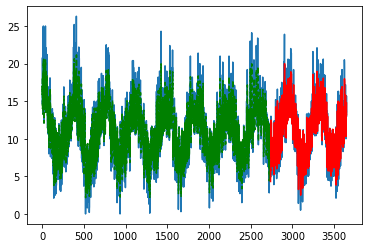

In [222]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred_org)+look_back, :] = train_pred_org
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pred_org)+(look_back)+1:len(dataset), :] = test_pred_org
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot,color="green",linestyle='dashed')
plt.plot(testPredictPlot,color="red")
plt.show()

In [ ]:
#Model_evaluation for lookback 3

In [224]:
import numpy as np
def create_seq_data(data, lookback=3):
  X, y = list(), list()
 #forming the sequence of X and y
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
    print(day)
    print('X {} to {}'.format(day, day+look_back))
    print(data[day: day+lookback, 0])
    print('Y {}'.format(day + look_back))
  return np.array(X), np.array(y)



In [226]:
look_back = 3
#forming ,train and test data
X_train, y_train = create_seq_data(train_scaled, look_back)
X_test, y_test = create_seq_data(test_scaled, look_back)
#reshaping the data to 3-D
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


Streaming output truncated to the last 5000 lines.
2394
X 2394 to 2397
[0.05703422 0.11026617 0.18250953]
Y 2397
2395
X 2395 to 2398
[0.11026617 0.18250953 0.23954375]
Y 2398
2396
X 2396 to 2399
[0.18250953 0.23954375 0.21673004]
Y 2399
2397
X 2397 to 2400
[0.23954375 0.21673004 0.2661597 ]
Y 2400
2398
X 2398 to 2401
[0.21673004 0.2661597  0.33460078]
Y 2401
2399
X 2399 to 2402
[0.2661597  0.33460078 0.3307985 ]
Y 2402
2400
X 2400 to 2403
[0.33460078 0.3307985  0.34220535]
Y 2403
2401
X 2401 to 2404
[0.3307985  0.34220535 0.36501905]
Y 2404
2402
X 2402 to 2405
[0.34220535 0.36501905 0.30418253]
Y 2405
2403
X 2403 to 2406
[0.36501905 0.30418253 0.31939164]
Y 2406
2404
X 2404 to 2407
[0.30418253 0.31939164 0.30798483]
Y 2407
2405
X 2405 to 2408
[0.31939164 0.30798483 0.34220535]
Y 2408
2406
X 2406 to 2409
[0.30798483 0.34220535 0.20152093]
Y 2409
2407
X 2407 to 2410
[0.34220535 0.20152093 0.33840305]
Y 2410
2408
X 2408 to 2411
[0.20152093 0.33840305 0.3307985 ]
Y 2411
2409
X 2409 to 2412

In [227]:

#using same memory
batch_size = 1
model = Sequential()
model.add(LSTM(10, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=2, shuffle=True)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (1, 10)                   480       
_________________________________________________________________
dense_5 (Dense)              (1, 1)                    11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2734/2734 - 4s - loss: 0.0191
Epoch 2/50
2734/2734 - 4s - loss: 0.0106
Epoch 3/50
2734/2734 - 4s - loss: 0.0101
Epoch 4/50
2734/2734 - 4s - loss: 0.0100
Epoch 5/50
2734/2734 - 4s - loss: 0.0099
Epoch 6/50
2734/2734 - 4s - loss: 0.0099
Epoch 7/50
2734/2734 - 4s - loss: 0.0098
Epoch 8/50
2734/2734 - 4s - loss: 0.0097
Epoch 9/50
2734/2734 - 4s - loss: 0.0097
Epoch 10/50
2734/2734 - 4s - loss: 0.0096
Epoch 11/50
2734/2734 - 4s - loss: 0.0097
Epoch 12/50
2734/2734 - 4s - loss: 0.0096
Epoch 13/50
2734/2734 -

In [228]:
trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(X_test, batch_size=batch_size)


In [229]:
#using inverse_transform to check the predicted orginal temperature
train_pred_org = scaler.inverse_transform(trainPredict)
y_train_org = scaler.inverse_transform([y_train])
test_pred_org = scaler.inverse_transform(testPredict)
y_test_org = scaler.inverse_transform([y_test])



In [230]:
trainScore1 = math.sqrt(mean_squared_error(y_train_org[0], train_pred_org[:,0]))
print('Train Score: %.2f RMSE' % (trainScore1))
# calculate root mean squared error for inverser transformed true and predicted lables of test data
test_score1 = math.sqrt(mean_squared_error(y_test_org[0], test_pred_org[:,0]))
print('Test Score: %.2f RMSE' % (test_score1))

Train Score: 2.58 RMSE
Test Score: 2.51 RMSE


In [240]:
#The RMSE increased with lookback 3

In [241]:
#
#using different memory
batch_size = 1
model = Sequential()
model.add(LSTM(8, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=2, shuffle=True)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (1, 8)                    320       
_________________________________________________________________
dense_6 (Dense)              (1, 1)                    9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2734/2734 - 4s - loss: 0.0132
Epoch 2/50
2734/2734 - 5s - loss: 0.0105
Epoch 3/50
2734/2734 - 5s - loss: 0.0103
Epoch 4/50
2734/2734 - 5s - loss: 0.0101
Epoch 5/50
2734/2734 - 5s - loss: 0.0100
Epoch 6/50
2734/2734 - 5s - loss: 0.0099
Epoch 7/50
2734/2734 - 5s - loss: 0.0098
Epoch 8/50
2734/2734 - 4s - loss: 0.0097
Epoch 9/50
2734/2734 - 4s - loss: 0.0096
Epoch 10/50
2734/2734 - 4s - loss: 0.0096
Epoch 11/50
2734/2734 - 4s - loss: 0.0096
Epoch 12/50
2734/2734 - 4s - loss: 0.0096
Epoch 13/50
2734/2734 -

In [242]:
trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(X_test, batch_size=batch_size)


In [243]:
train_pred_org = scaler.inverse_transform(trainPredict)
y_train_org = scaler.inverse_transform([y_train])
test_pred_org = scaler.inverse_transform(testPredict)
y_test_org = scaler.inverse_transform([y_test])


In [244]:
trainScore1 = math.sqrt(mean_squared_error(y_train_org[0], train_pred_org[:,0]))
print('Train Score: %.2f RMSE' % (trainScore1))
# calculate root mean squared error for inverser transformed true and predicted lables of test data
test_score1 = math.sqrt(mean_squared_error(y_test_org[0], test_pred_org[:,0]))
print('Test Score: %.2f RMSE' % (test_score1))

Train Score: 2.54 RMSE
Test Score: 2.46 RMSE


In [ ]:
#with reduced memory RMSE has decreased

In [ ]:
#Conclusion: built LSTM model to predict temprature using lookback1, lookback 3.  With reduced memory the RMSE has decreased a little